In [1]:
import os
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Download the dataset from Kaggle
os.system('kaggle datasets download -d gauravmalik26/food-delivery-dataset')

# Step 2: Extract the ZIP file
with zipfile.ZipFile('food-delivery-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('food_delivery_dataset')

# Step 3: List the files in the extracted directory to find the correct CSV file name
extracted_dir = 'food_delivery_dataset'
files = os.listdir(extracted_dir)
print("Extracted files:", files)

# Step 4: Use the correct file from the extracted list
csv_file_path = f"{extracted_dir}/train.csv"  # Replace with 'train.csv' since it's one of the files

# Step 5: Create a DataFrame from the extracted CSV file
df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
print(df.head())


Extracted files: ['Sample_Submission.csv', 'test.csv', 'train.csv']
        ID Delivery_person_ID Delivery_person_Age Delivery_person_Ratings  \
0  0x4607     INDORES13DEL02                   37                     4.9   
1  0xb379     BANGRES18DEL02                   34                     4.5   
2  0x5d6d     BANGRES19DEL01                   23                     4.4   
3  0x7a6a    COIMBRES13DEL02                   38                     4.7   
4  0x70a2     CHENRES12DEL01                   32                     4.6   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   

   Delivery_

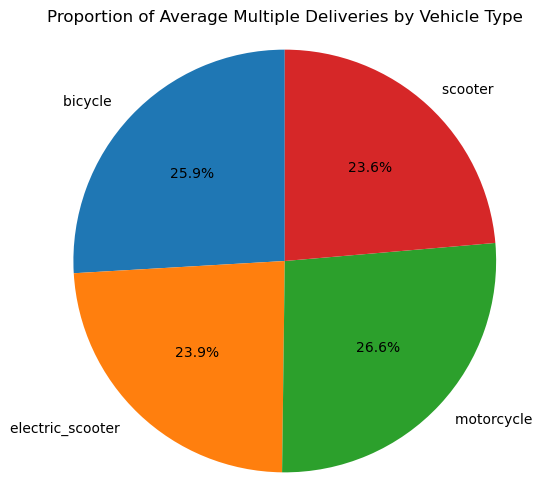

In [64]:
#Hypothesis-1 : Motorcycles are able to do multiple deliveries compare to bicycle, electric_scooter and scooter

import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
csv_file_path = f"{extracted_dir}/train.csv"
df = pd.read_csv(csv_file_path)

# Convert 'multiple_deliveries' to numeric, setting errors='coerce' to handle non-numeric values
df['multiple_deliveries'] = pd.to_numeric(df['multiple_deliveries'], errors='coerce')

# Drop rows with NaN values in 'multiple_deliveries' column
df = df.dropna(subset=['multiple_deliveries'])

# Group by 'Type_of_vehicle' and calculate the average multiple deliveries
grouped_data = df.groupby('Type_of_vehicle')['multiple_deliveries'].mean().reset_index()

# Plot the Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(grouped_data['multiple_deliveries'], labels=grouped_data['Type_of_vehicle'], autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Average Multiple Deliveries by Vehicle Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


This Pie Chart displays the proportion of average multiple deliveries by type_of_vehicle. motorcycle dominate the proportion, handling more multiple deliveries compared to electric_scooter,bicycle and scooter.

<Figure size 800x600 with 0 Axes>

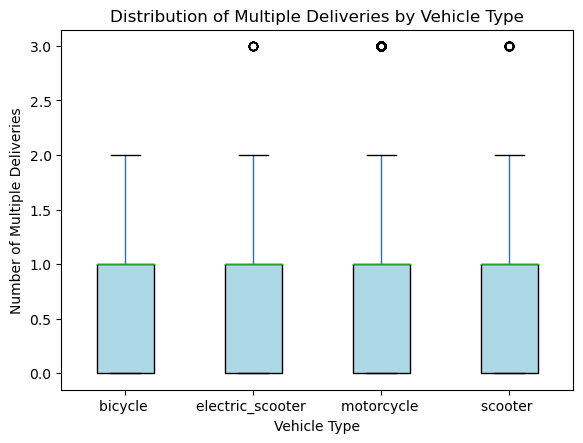

In [65]:
import matplotlib.pyplot as plt

# Ensure 'multiple_deliveries' column is numeric, coercing errors to NaN and dropping NaN values
df['multiple_deliveries'] = pd.to_numeric(df['multiple_deliveries'], errors='coerce')
df = df.dropna(subset=['multiple_deliveries'])

# Plotting the Box Plot for Distribution of Multiple Deliveries by Vehicle Type
plt.figure(figsize=(8, 6))
df.boxplot(column='multiple_deliveries', by='Type_of_vehicle', grid=False, patch_artist=True,
           boxprops=dict(facecolor='lightblue'))
plt.title('Distribution of Multiple Deliveries by Vehicle Type')
plt.suptitle('')  # Remove the default 'Boxplot grouped by...' title
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Multiple Deliveries')
plt.show()


While the box plot shows that most vehicles have similar central tendencies, motorcycles appear more frequently among outliers, suggesting they might indeed be preferred for higher counts of multiple deliveries. This supports the hypothesis that motorcycles, compared to scooters and bicycles, are more likely to be used for multiple deliveries. Further analysis could solidify this by testing if the mean or median number of multiple deliveries for motorcycles is statistically higher than for other vehicles.

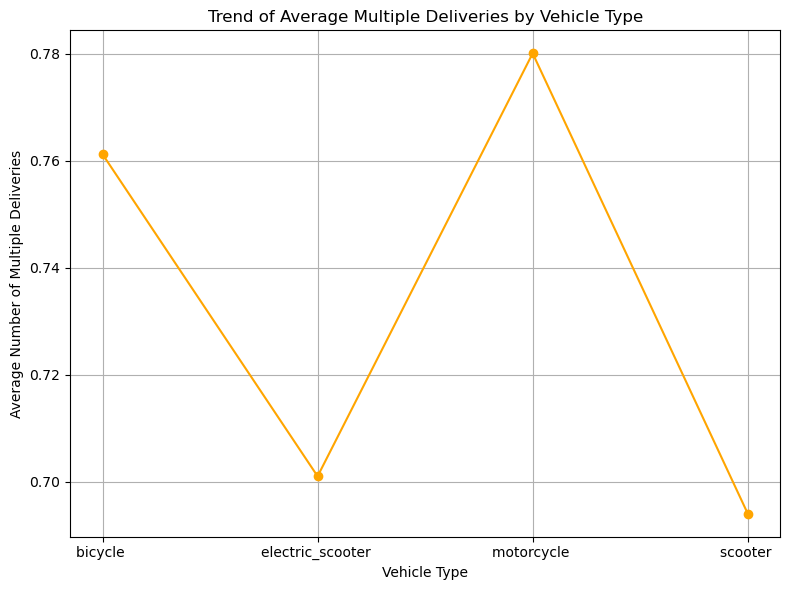

In [66]:
import matplotlib.pyplot as plt

# Assuming `grouped_data` was created as follows:
# grouped_data = df.groupby('Type_of_vehicle')['multiple_deliveries'].mean().reset_index()

# Plotting the Line Chart for the Trend of Average Multiple Deliveries Across Vehicle Types
plt.figure(figsize=(8, 6))
plt.plot(grouped_data['Type_of_vehicle'], grouped_data['multiple_deliveries'], marker='o', linestyle='-', color='orange')
plt.title('Trend of Average Multiple Deliveries by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Average Number of Multiple Deliveries')
plt.grid(True)
plt.tight_layout()
plt.show()


The line chart shows that motorcycles have the highest average number of multiple deliveries, followed by bicycles. Electric scooters and regular scooters have lower averages, with electric scooters having the lowest. This suggests that motorcycles are preferred for tasks requiring multiple deliveries compared to other vehicle types.

<Figure size 1000x600 with 0 Axes>

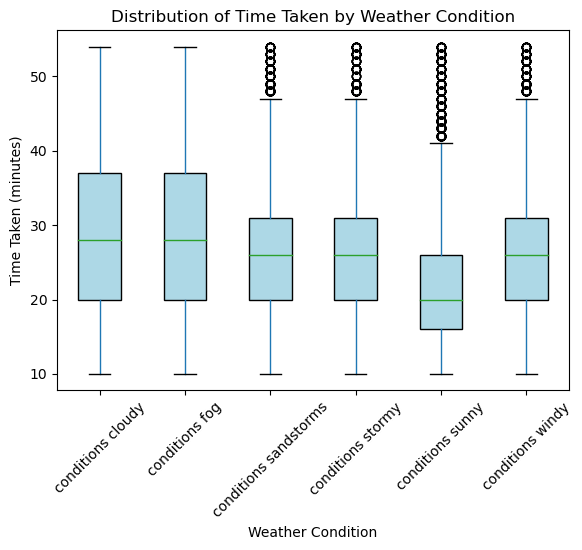

In [67]:
# Hypothesis-2 the weather conditions impact the time taken to deliver

import matplotlib.pyplot as plt
import pandas as pd

csv_file_path = f"{extracted_dir}/train.csv"
df = pd.read_csv(csv_file_path)

# Ensure 'Time_taken(min)' is treated as a string, then extract numeric values
df['Time_taken(min)'] = df['Time_taken(min)'].astype(str).str.extract('(\d+)').astype(float)

# Clean up any extra spaces and lowercase all entries in 'Weatherconditions' to standardize
df['Weatherconditions'] = df['Weatherconditions'].str.strip().str.lower()

# Define a list of valid weather conditions (adjust based on your dataset if needed)
valid_conditions = [
    'conditions cloudy', 'conditions fog', 'conditions sandstorms',
    'conditions stormy', 'conditions sunny', 'conditions windy'
]

# Filter out rows where 'Weatherconditions' is not in the list of valid conditions
df = df[df['Weatherconditions'].isin(valid_conditions)]

# Box Plot: Distribution of Time Taken by Weather Condition with rotated x-axis labels
plt.figure(figsize=(10, 6))
df.boxplot(column='Time_taken(min)', by='Weatherconditions', grid=False, patch_artist=True,
           boxprops=dict(facecolor='lightblue'))
plt.title('Distribution of Time Taken by Weather Condition')
plt.suptitle('')  # Remove default 'Boxplot grouped by...' title
plt.xlabel('Weather Condition')
plt.ylabel('Time Taken (minutes)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


The box plot shows that deliveries take longer on average under stormy and sandstorm conditions, with a higher number of outliers, indicating delays. In contrast, sunny and windy conditions have shorter delivery times with fewer extreme values, suggesting that clear weather facilitates quicker deliveries.

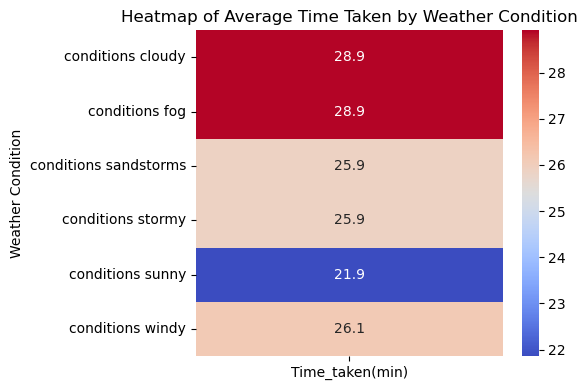

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filter data to only include valid weather conditions and ensure numeric time values
valid_conditions = [
    'conditions cloudy', 'conditions fog', 'conditions sandstorms',
    'conditions stormy', 'conditions sunny', 'conditions windy'
]

# Clean up 'Weatherconditions' and standardize it
df['Weatherconditions'] = df['Weatherconditions'].str.strip().str.lower()
df['Time_taken(min)'] = df['Time_taken(min)'].astype(float)

# Filter the DataFrame for valid weather conditions
df = df[df['Weatherconditions'].isin(valid_conditions)]

# Pivot table to calculate average time taken by weather condition
heatmap_weather_data = df.pivot_table(values='Time_taken(min)', index='Weatherconditions', aggfunc='mean')

# Plotting the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(heatmap_weather_data, annot=True, cmap='coolwarm', cbar=True, fmt=".1f")
plt.title('Heatmap of Average Time Taken by Weather Condition')
plt.xlabel('')  # No label needed for the x-axis in this case
plt.ylabel('Weather Condition')
plt.tight_layout()
plt.show()


The heatmap shows that cloudy and foggy conditions have the highest average delivery times (29 minutes), while sunny conditions have the lowest (21.9 minutes). This suggests that clear weather (sunny) facilitates faster deliveries, while adverse conditions (cloudy and foggy) tend to slow them down.